# Housing Market in Constance II (Analysis)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

### Import Data

In [2]:
df = pd.read_csv('Data/0_total.csv', sep=';')
df.head()

,id,size,price,price_m2,location,address,street,number,address_geopy,lat,long,hhSize,hhF,hhM,title,link,timestamp,inactive-stamp,active
0,6516868,11,315.0,28.636364,Paradies,"Grießeggstraße, Konstanz",Grießeggstraße,NaN,"Grießeggstraße, Paradies, Konstanz, Verwaltung...",47.663124,9.160842,4.0,2.0,1.0,möbliertes Zimmer zur Zwischenmiete in gemütli...,https://www.wg-gesucht.de/wg-zimmer-in-Konstan...,20190723-0650,20190805-2050,False
1,7107983,12,400.0,33.333333,Petershausen-West,"Markgrafenstraße, Konstanz",Markgrafenstraße,NaN,"Markgrafenstraße, Petershausen-West, Konstanz,...",47.671879,9.174288,3.0,2.0,0.0,"12qm WG Zimmer in bester Lage, befristet",https://www.wg-gesucht.de/wg-zimmer-in-Konstan...,20190723-0650,20190728-1250,False
2,7418840,25,375.0,15.000000,Dettingen,"Waldstraße 7, Konstanz",Waldstraße,7,"7, Waldstraße, Dettingen, Dettingen-Wallhausen...",47.731458,9.119638,4.0,1.0,2.0,Großes Zimmer mit Balkon in gemütlicher 4er WG...,https://www.wg-gesucht.de/wg-zimmer-in-Konstan...,20190723-0650,20190808-1250,False
3,7408921,8,304.0,38.000000,Fürstenberg,"Längerbohlstraße, Konstanz",Längerbohlstraße,NaN,"Längerbohlstraße, Fürstenberg, Konstanz, Verwa...",47.685569,9.158543,3.0,1.0,0.0,"Gemütliches, möbliertes Zimmer in WG-Haus",https://www.wg-gesucht.de/wg-zimmer-in-Konstan...,20190723-0650,20190803-1250,False
4,7444271,11,338.0,30.727273,Petershausen-West,"Alemannenstr. 11, Konstanz",Alemannenstr.,11,"11, Alemannenstraße, Petershausen-West, Konsta...",47.672214,9.172811,3.0,1.0,1.0,Süßes WG-Zimmer im Petershauser Park für 6 Mon...,https://www.wg-gesucht.de/wg-zimmer-in-Konstan...,20190723-0650,20190804-2050,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 19 columns):
id                1256 non-null int64
size              1256 non-null int64
price             1066 non-null float64
price_m2          1066 non-null float64
location          1256 non-null object
address           1256 non-null object
street            1256 non-null object
number            875 non-null object
address_geopy     1237 non-null object
lat               1237 non-null float64
long              1237 non-null float64
hhSize            1066 non-null float64
hhF               1066 non-null float64
hhM               1066 non-null float64
title             1256 non-null object
link              1256 non-null object
timestamp         1256 non-null object
inactive-stamp    681 non-null object
active            1256 non-null bool
dtypes: bool(1), float64(7), int64(2), object(9)
memory usage: 178.0+ KB


### Descriptive Analysis

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

2019-30    553
2019-31     90
2019-32     68
2019-33     70
2019-34     62
2019-35     58
2019-36     51
2019-37     39
2019-38     35
2019-39     27
2019-40     32
2019-41     34
2019-42     15
2019-43     27
2019-44      6
2019-45      1
2019-46      3
2019-47      3
2019-48      1
2019-49      6
2019-50      1
2020-1       9
2020-2      43
2020-3      10
2020-4      12
Name: calender week, dtype: int64


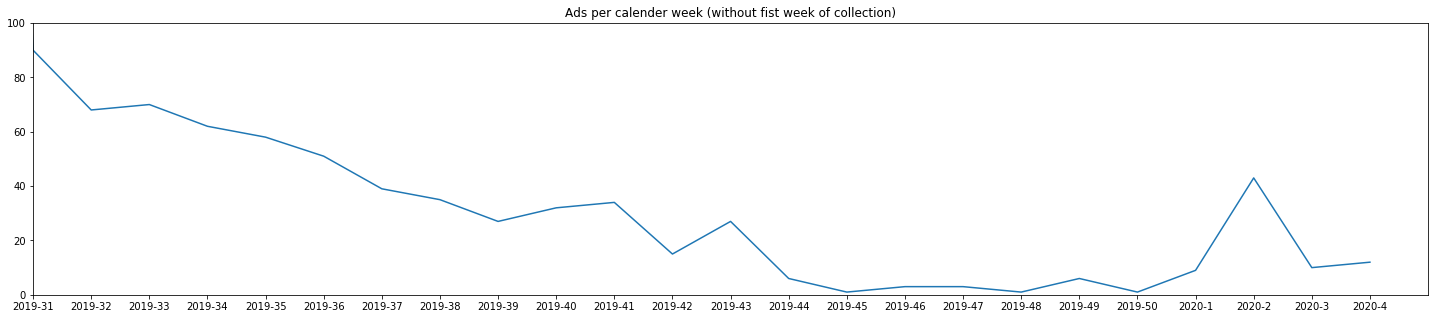

In [5]:
# Create column of calender weeks from timestamp
df['calender week'] = df['timestamp'].dt.year.astype('str') + '-' + df['timestamp'].dt.week.astype('str')
counting_weeks = df['calender week'].value_counts().sort_index()
print(counting_weeks)

# Create plot for visualizing the number of ads per week
# Without the first week, since this was a clear outlier
# (first time running the script collected all ads online)
plt.figure(figsize=(25,5))
plt.title('Ads per calender week (without fist week of collection)')
plt.plot(counting_weeks)
plt.ylim(0,100)
plt.xlim(1,len(counting_weeks))
plt.show()

In [6]:
means = df[['size', 'price', 'price_m2', 'hhSize']].groupby(df['location']).mean()
counts = df[['size', 'price']].groupby(df['location']).count()
total = counts['size']
active = counts['price']

means['total'] = total
means['active'] = active

means

,size,price,price_m2,hhSize,total,active
location,,,,,,
Allmannsdorf,14.814286,365.192982,25.122293,4.192982,70,57
Altstadt,17.497890,420.857143,25.417918,3.904762,237,210
Dettingen,16.428571,374.615385,23.997567,6.692308,28,26
Dingelsdorf,19.000000,399.875000,22.861222,2.750000,12,8
Egg,18.000000,620.636364,37.435919,3.727273,14,11
Fürstenberg,15.771930,392.891156,26.395271,3.489796,171,147
Industriegebiet,19.458333,398.181818,24.422131,3.454545,24,22
Kreuzlingen,14.509091,382.934783,27.146055,4.239130,55,46
Königsbau,14.813333,380.681159,26.235472,3.898551,75,69


In [7]:
# Keep only the changed ads (active to inactive)
df_changed = df.dropna(axis=0, subset=['inactive-stamp'])
df_changed = df_changed.reset_index()

# Turn the timestamp to datetime-format
df_changed['timestamp'] = pd.to_datetime(df_changed['timestamp'])
df_changed['inactive-stamp'] = pd.to_datetime(df_changed['inactive-stamp'])

# Create a column of activity-duration 
df_changed['span'] = df_changed['inactive-stamp'] - df_changed['timestamp']

# Measure that span in hours
df_changed['span_hours'] = df_changed['span'].astype('timedelta64[h]')

# Check results
df_changed[['timestamp', 'inactive-stamp', 'span', 'span_hours']].sample(10)
df_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 23 columns):
index             681 non-null int64
id                681 non-null int64
size              681 non-null int64
price             632 non-null float64
price_m2          632 non-null float64
location          681 non-null object
address           681 non-null object
street            681 non-null object
number            460 non-null object
address_geopy     668 non-null object
lat               668 non-null float64
long              668 non-null float64
hhSize            632 non-null float64
hhF               632 non-null float64
hhM               632 non-null float64
title             681 non-null object
link              681 non-null object
timestamp         681 non-null datetime64[ns]
inactive-stamp    681 non-null datetime64[ns]
active            681 non-null bool
calender week     681 non-null object
span              681 non-null timedelta64[ns]
span_hours        681 non-null f

### Duration of Ads

In [8]:
# Bin the duration in hours of (5h per bin)
df_changed['span_hours_bins'] = pd.cut(df_changed['span_hours'],
                                       range(0,200,5),
                                       labels=np.arange(2.5,197.5,5))

# Calculate mean and median acivity duration
average_span = df_changed['span'].sum() / len(df_changed['span'])
print('Average duration of activity:', average_span)
print('That approximately equals ' + str(int(df_changed['span_hours'].mean())) + ' hours.')
print('Median is ' + str(int(df_changed['span_hours'].median())) + ' hours.')

Average duration of activity: 20 days 21:13:18.237885
That approximately equals 501 hours.
Median is 276 hours.


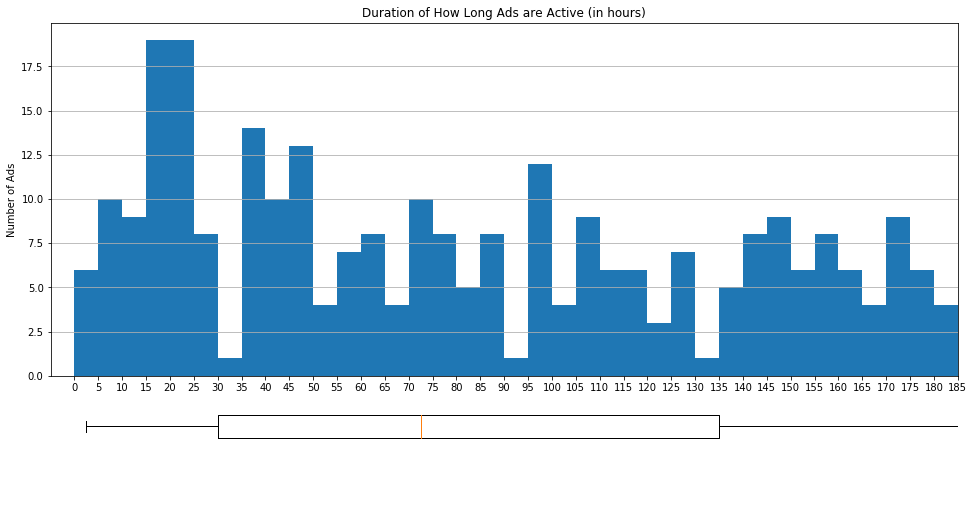

In [9]:
# Set figure size (get boxplot right below x-axis of histogram)
f = plt.figure(figsize=(14,7))
axes1 = f.add_axes([0.05, 0.2, 0.9, 0.7])
axes2 = f.add_axes([0.05, -.05, 0.9, 0.3])

# Create barplot
axes1.bar(x = df_changed['span_hours_bins'].value_counts().sort_index().index.tolist(),
          height = df_changed['span_hours_bins'].value_counts().sort_index().values.tolist(),
          width = 5)
axes1.set_xlim(-5,185)
axes1.set_xticks(range(0, 190, 5))
axes1.set_title('Duration of How Long Ads are Active (in hours)')
axes1.set_ylabel('Number of Ads')
axes1.grid(axis='y')

# Create boxplot
boxplot = df_changed['span_hours_bins'].dropna()
axes2.boxplot(boxplot,
              vert=False)
axes2.set_xlim(-5,185)
axes2.set_xticks([])
axes2.set_yticks([])
plt.box(False)

plt.show()

### Distribution of Room Sizes

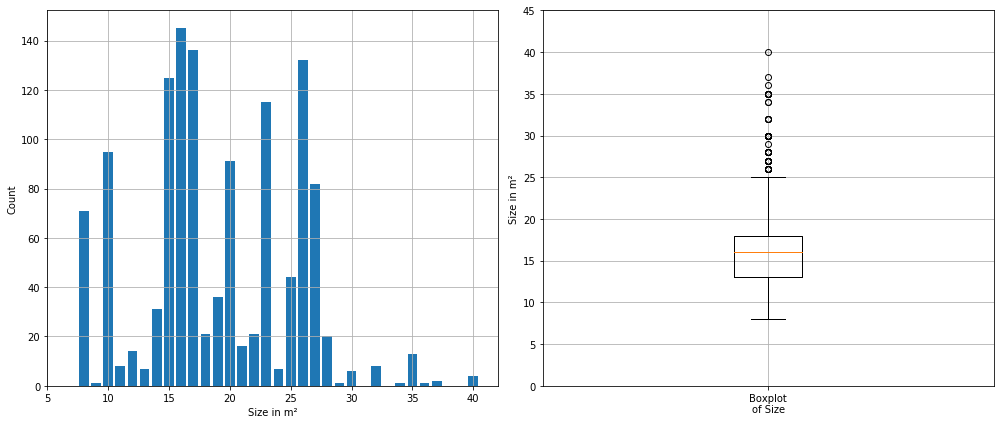

In [10]:
# Delete cases of unrealistic size
df_clean = df[(df['size'] > 5) & (df['size'] < 45)]

# Create a plot
f = plt.figure(figsize = (14,6))

# Add a barchart to the plot
bar = plt.subplot(1, 2, 1)
plt.bar(x = df_clean['size'].unique(),
        height = df_clean.groupby('size').count()['id'].tolist())
plt.xticks(range(5, 45, 5))
plt.xlabel('Size in m²')
plt.ylabel('Count')
bar.grid()

# Add a boxplot to the plot
box = plt.subplot(1,2,2)
plt.boxplot(df_clean['size'])
plt.xticks([1],['Boxplot\nof Size'])
plt.ylabel('Size in m²')
plt.yticks(range(0, 50, 5))
box.grid()

# Narrow and show the plot
plt.tight_layout()
plt.show()

### Size by District

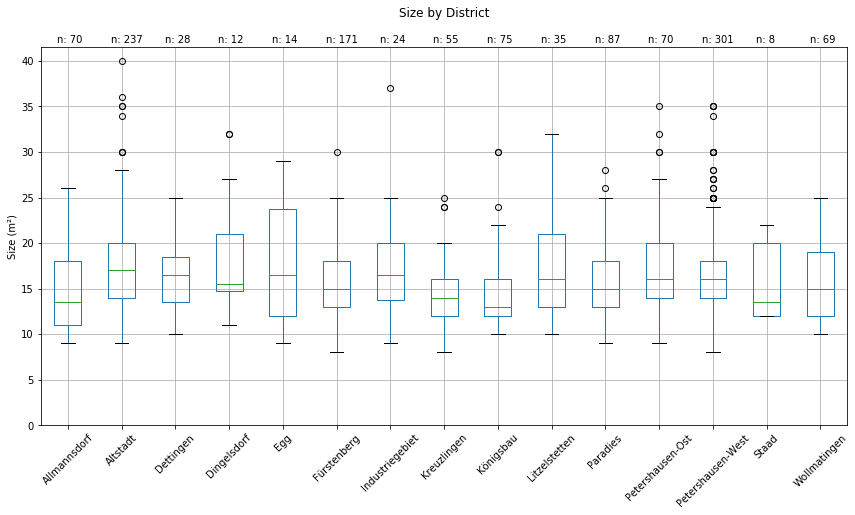

In [11]:
active = df['size'].groupby(df['location']).count()

df.boxplot(column = 'size',
           by = 'location',
           figsize = (14,7)
          )
for j, i in enumerate(active):
    plt.text(j+0.8, 42, str('n: ' + str(i)))

plt.ylim(0,41.5)
plt.yticks(range(0,45,5))
plt.xticks(rotation=45)
plt.ylabel('Size (m²)')
plt.xlabel('')
plt.title('')
plt.suptitle('Size by District')
plt.show()

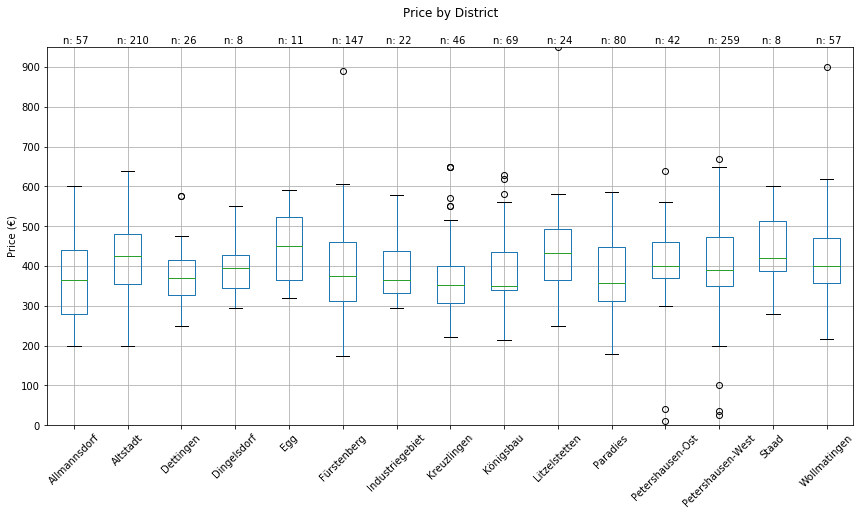

In [12]:
# Create a dataframe with only complete obs for price-analysis
dfprice = df.copy()
dfprice.dropna(subset = ['price'], inplace = True)

active = dfprice['price'].groupby(dfprice['location']).count()

dfprice.boxplot(column = 'price',
                by = 'location',
                figsize = (14,7)
               )
for j, i in enumerate(active):
    plt.text(j+0.8, 960, str('n: ' + str(i)))
plt.ylim(0,950)
plt.yticks(range(0,1000,100))
plt.xticks(rotation=45)
plt.ylabel('Price (€)')
plt.xlabel('')
plt.title('')
plt.suptitle('Price by District')
plt.show()

### Price per Square Meter by District

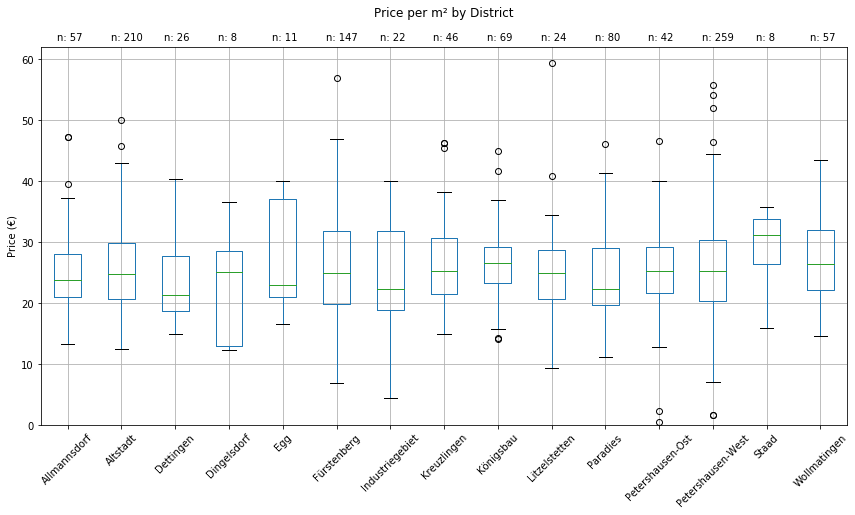

In [13]:
# Create a dataframe with only complete obs for price-analysis
dfpricem2 = df.copy()
dfpricem2.dropna(subset = ['price_m2'], inplace = True)
active = dfpricem2['price'].groupby(dfpricem2['location']).count()

dfpricem2.boxplot(column = 'price_m2',
                  by = 'location',
                  figsize = (14,7)
                 )
for j, i in enumerate(active):
    plt.text(j+0.8, 63, str('n: ' + str(i)))

plt.ylim(0,62)
plt.yticks(range(0,70,10))
plt.xticks(rotation = 45)
plt.ylabel('Price (€)')
plt.xlabel('')
plt.title('')
plt.suptitle('Price per m² by District')
plt.show()

### Maps

In [14]:
# Create a new reduced dataframe for plotting maps
df = df.dropna(subset = ['street', 'number', 'lat', 'long'])
df = df.dropna(subset = ['price'])
df['price'] = df['price'].astype(int)

# Create the empty map
kn_map = folium.Map(location = [47.671, 9.174],
                    zoom_start = 14)

# Get data to map and markers to data
wg = folium.map.FeatureGroup()
for lat, long, ids, price, size in list(zip(df['lat'].values,
                                            df['long'].values,
                                            df['id'].values,
                                            df['price'].values,
                                            df['size'].values)):
    html = """
           <table>
            <tr>
             <td><strong>ID:&nbsp;</strong></td>
             <td>{}</td>
            </tr>
            <tr>
             <td>&nbsp;</td>
            </tr>
            <tr>
            </tr>
             <td><strong>Price:&nbsp;</strong></td>
             <td>{} &euro;</td>
            </tr>
            <tr>
             <td>&nbsp;</td>
            </tr>
            <tr>
            </tr>
             <td><strong>Size:&nbsp;</strong></td>
             <td>{}m&sup2;</td>
            </tr>
           </table>
           """.format(ids, price, size)  
    
    folium.CircleMarker(location = [lat, long],
                        radius = 6,
                        fill = True,
                        fill_color = '#3186cc',
                        popup = html
                       ).add_to(kn_map)

# Connect data to map
kn_map.add_child(wg)
kn_map


In [15]:
# Renew Data and keep all with coordinates
# Adjust path for recreation!
df = pd.read_csv('Data/0_total.csv', sep=';')
df = df.dropna(subset = ['lat', 'long'])

# Create the empty map
kn_hmap = folium.Map(location = [47.671, 9.174],
                     zoom_start = 14)

# Create the data and design of display
hm_data = HeatMap(list(zip(df['lat'].values,
                           df['long'].values)),
                  radius=15,
                  blur=20, 
                  max_zoom=15
                 )

# Connect data to map
kn_hmap.add_child(hm_data)
kn_hmap